In [19]:
### Football Stats of the 2022-23 season
import pandas as pd

df = pd.read_html('https://fbref.com/en/comps/9/stats/Premier-League-Stats')

import requests
import os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

In [20]:
driver = webdriver.Chrome(
    executable_path="/Users/vik/chromedriver"
    )

C:\Users\Shardool\AppData\Local\Temp\ipykernel_10132\3988874453.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(


In [21]:
player_stats_url = "https://fbref.com/en/comps/9/stats/Premier-League-Stats"

data = requests.get(player_stats_url)
    
with open("PL_playerdata.html", "w+") as f:
    f.write(data.text)

In [22]:
driver.get(player_stats_url)
driver.execute_script("window.scrollTo(1,10000)")
time.sleep(2)
    
with open("PL_playerdata.html", "w+") as f:
    f.write(driver.page_source)
    
  

In [23]:
from bs4 import BeautifulSoup
dfs = []
with open("PL_playerdata.html") as f:
    page = f.read()
    soup = BeautifulSoup(page, 'html.parser')
    soup.find('tr', class_="thead").decompose()
    player_table = soup.find_all(id="stats_standard")[0]
    player_df = pd.read_html(str(player_table))[0]
    dfs.append(player_df)

In [25]:
player_data = pd.concat(dfs)

player_data.to_csv("PL_playerdata.csv")

In [51]:
player_data = pd.read_csv('PL_playerdata.csv')
#player_data.head(5)

player_data = player_data[player_data['Player'] != 'Player']

player_data['Min'] = pd.to_numeric(player_data['Min'])



In [59]:
for cols in  player_data.columns[6:-1]:
    player_data[cols] = pd.to_numeric(player_data[cols])
    
data_flt = player_data[player_data['Min'] > 1200]


Text(0, 0.5, 'Expected Assists')

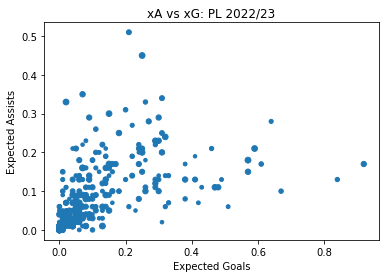

In [70]:
import matplotlib.pyplot as plt 
s_marker = data_flt['Min']

plt.scatter(data_flt['xG.1'], data_flt['xAG.1'],s=s_marker/50)

plt.title('xA vs xG: PL 2022/23')
plt.xlabel('Expected Goals')
plt.ylabel('Expected Assists')